# Sales Prediction

The aim is to build a model which predicts sales based on the money spent on different platforms such as TV, radio, and newspaper for marketing.

In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [522]:
dataset = pd.read_csv("advertising.csv")

In [523]:
dataset.head()

,TV ($),Radio ($),Newspaper ($),Sales (M$)
0,230100.0,37800.0,69200.0,22.1
1,44500.0,39300.0,45100.0,10.4
2,17200.0,45900.0,69300.0,12.0
3,151500.0,41300.0,58500.0,16.5
4,180800.0,10800.0,58400.0,17.9


# Data Pre-Processing

In [524]:
dataset.shape

(200, 4)

**1. Checking for missing values**

In [525]:
dataset.isna().sum()

TV ($)           0
Radio ($)        0
Newspaper ($)    0
Sales (M$)       0
dtype: int64

**2. Checking for duplicate rows**

In [526]:
dataset.duplicated().any()

False

**3. Checking for outliers**

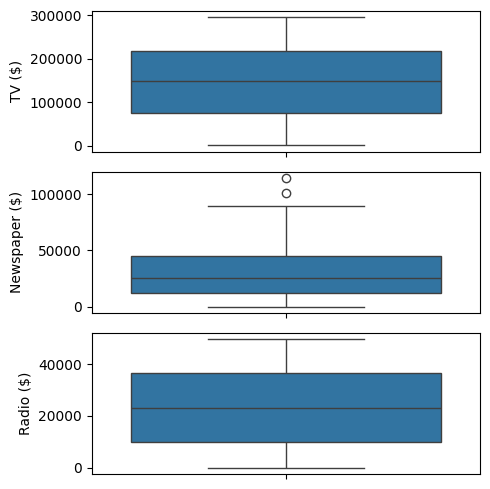

In [527]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV ($)'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper ($)'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio ($)'], ax = axs[2])
plt.tight_layout()

# Exploratory Data Analysis

**1. Distribution of the target variable**

<Axes: xlabel='Sales (M$)', ylabel='Density'>

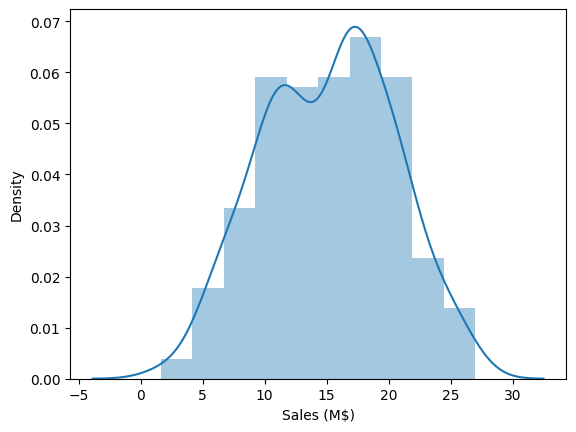

In [528]:
sns.distplot(dataset['Sales (M$)'])

**2. How Sales are related with other variables**

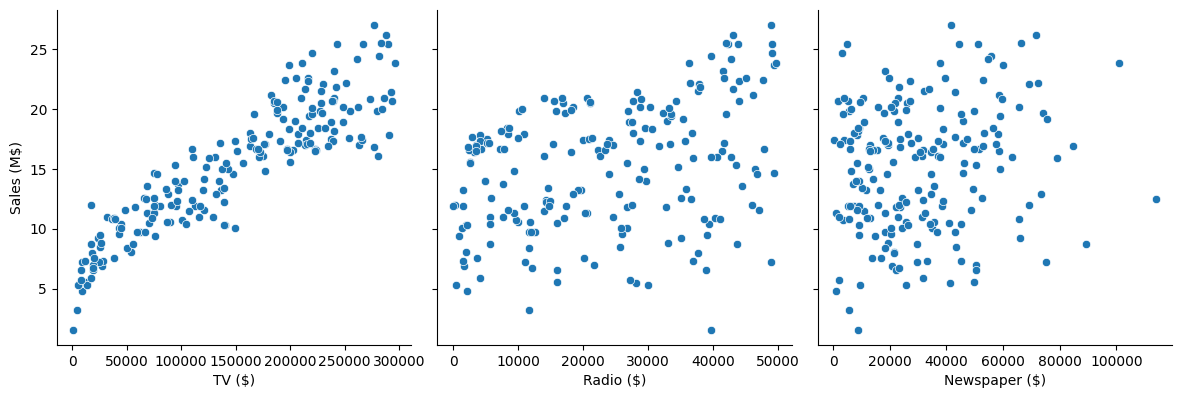

In [529]:
sns.pairplot(dataset, x_vars=['TV ($)', 'Radio ($)', 'Newspaper ($)'], y_vars='Sales (M$)', height=4, aspect=1, kind='scatter')
plt.show()

**Conclusion:** TV is strongly, positively, linearly correlated with the target variable. But the Newspaper feature seems to be uncorrelated

**3. Heatmap**

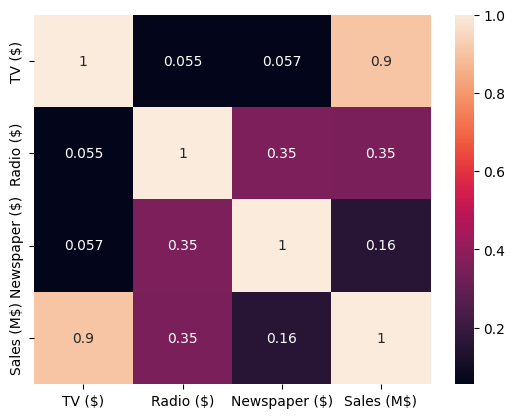

In [530]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Model Building

In [531]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

X = dataset[['TV ($)','Radio ($)','Newspaper ($)']]
y = dataset[['Sales (M$)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
slr = LinearRegression()

**Decision Tree**

In [532]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [533]:
y_pred_dt = dt.predict(X_test)

In [534]:
print('R-squared score, MAE, MSE for DT\n')
print('R-squared Score:', r2_score(y_test, y_pred_dt)*100)
print('MAE:',mean_absolute_error(y_test, y_pred_dt))
print('MSE:',mean_squared_error(y_test, y_pred_dt))

R-squared score, MAE, MSE for DT

R-squared Score: 89.02375525309586
MAE: 1.4200000000000002
MSE: 3.070666666666666


**K-Nearest Neighbors**

In [535]:

knn.fit(X_train, y_train)

KNeighborsRegressor()

In [536]:

y_pred_knn = knn.predict(X_test)


In [537]:
print('R-squared score, MAE, MSE for KNN\n')
print('R-squared Score:', r2_score(y_test, y_pred_knn)*100)
print('MAE:',mean_absolute_error(y_test, y_pred_knn))
print('MSE:',mean_squared_error(y_test, y_pred_knn))

R-squared score, MAE, MSE for KNN

R-squared Score: 88.31518455985997
MAE: 1.3973333333333333
MSE: 3.2688933333333337


**Random Forest**

In [538]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [539]:
y_pred_rf = rf.predict(X_test)

In [540]:
print('R-squared score, MAE, MSE for RF\n')
print('R-squared Score:', r2_score(y_test, y_pred_rf)*100)
print('MAE:',mean_absolute_error(y_test, y_pred_rf))
print('MSE:',mean_squared_error(y_test, y_pred_rf))

R-squared score, MAE, MSE for RF

R-squared Score: 94.3423943155158
MAE: 0.9805833333333331
MSE: 1.5827472500000017


**Simple Linear Regression**

In [541]:
x = dataset[['TV ($)']]
y1 = dataset['Sales (M$)']
x_tr, x_tes, y_tr, y_tes = train_test_split(x, y1, test_size=0.3, random_state=42)

In [542]:
slr.fit(x_tr, y_tr)

LinearRegression()

In [543]:
y_pred_slr= slr.predict(x_tes)  

In [544]:
print('R-squared score, MAE, MSE for Linear Regression\n')
print('R-squared Score:', r2_score(y_test, y_pred_slr)*100)
print('MAE:',mean_absolute_error(y_test, y_pred_slr))
print('MSE:',mean_squared_error(y_test, y_pred_slr))

R-squared score, MAE, MSE for Linear Regression

R-squared Score: 81.48553892086791
MAE: 1.8069123776641516
MSE: 5.179525402166652


In [545]:
print(dt.predict([[69000,9300,900]]))
print(knn.predict([[69000,9300,900]]))
print(rf.predict([[69000,9300,900]]))
print(slr.predict([[163300]]))

[9.7]
[[12.44]]
[10.959]
[16.16109107]


# Plots

In [546]:
# print(y_test.shape)
# print(y_pred_slr.shape)

y_test_array = np.squeeze(np.asarray(y_test))
y_pred_slr_array = np.squeeze(np.asarray(y_pred_slr))  # Simple Linear Regression
y_pred_dt_array = np.squeeze(np.asarray(y_pred_dt))    # Decision Tree
y_pred_rf_array = np.squeeze(np.asarray(y_pred_rf))    # Random Forest
y_pred_knn_array = np.squeeze(np.asarray(y_pred_knn))  # KNN


predictions = pd.DataFrame({
    'y_test': y_test_array,
    'y_pred_slr': y_pred_slr_array,
    'y_pred_dt': y_pred_dt_array,
    'y_pred_rf': y_pred_rf_array,
    'y_pred_knn': y_pred_knn_array
})

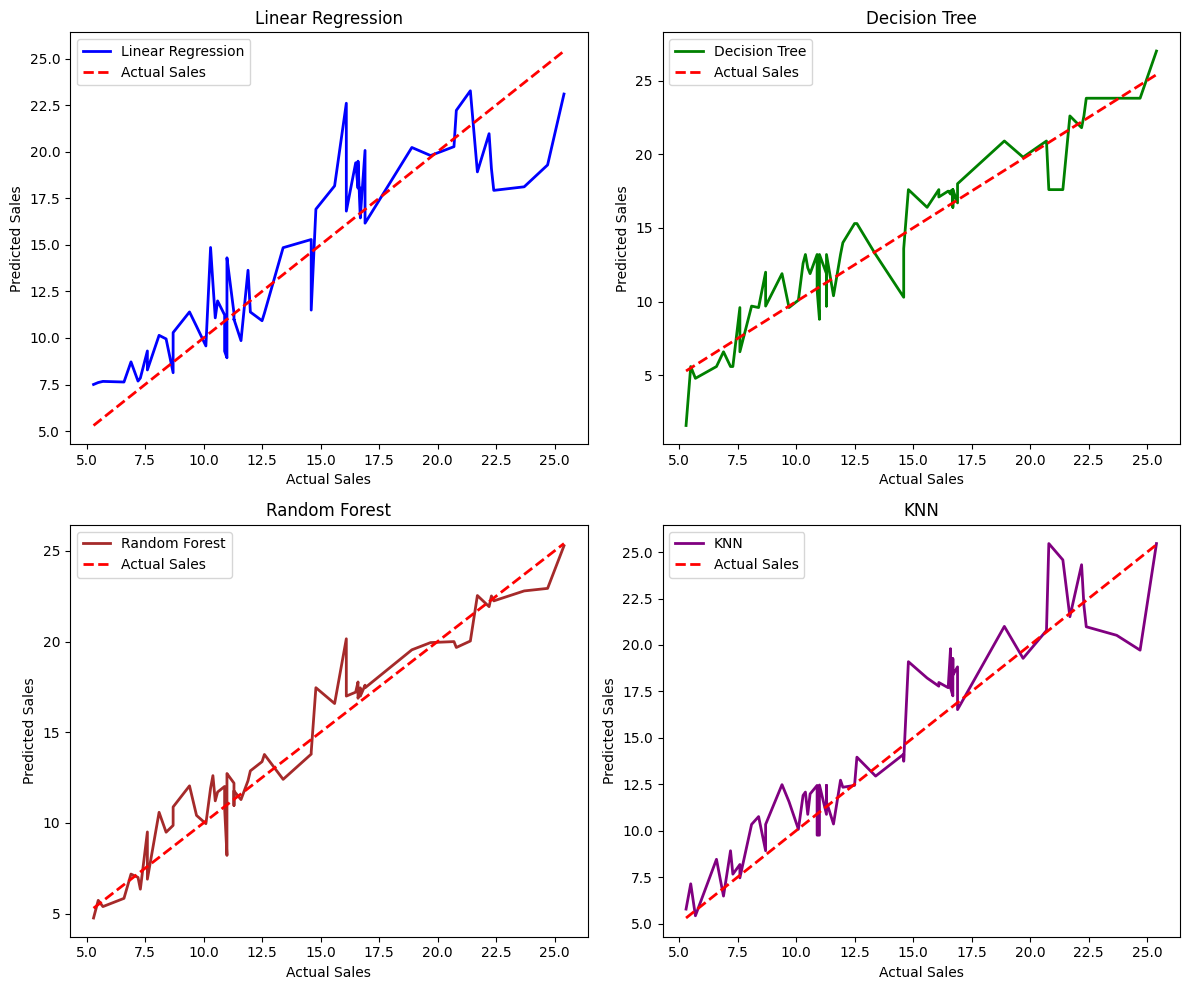

In [547]:
predictions.sort_values(by='y_test', inplace=True)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Linear Regression
axs[0, 0].plot(predictions['y_test'], predictions['y_pred_slr'], label='Linear Regression', color='blue', linewidth=2)
axs[0, 0].plot(predictions['y_test'], predictions['y_test'], 'r--', label='Actual Sales', linewidth=2)
axs[0, 0].set_title("Linear Regression")
axs[0, 0].set_xlabel("Actual Sales")
axs[0, 0].set_ylabel("Predicted Sales")
axs[0, 0].legend()

# Plot for Decision Tree
axs[0, 1].plot(predictions['y_test'], predictions['y_pred_dt'], label='Decision Tree', color='green', linewidth=2)
axs[0, 1].plot(predictions['y_test'], predictions['y_test'], 'r--', label='Actual Sales', linewidth=2)
axs[0, 1].set_title("Decision Tree")
axs[0, 1].set_xlabel("Actual Sales")
axs[0, 1].set_ylabel("Predicted Sales")
axs[0, 1].legend()

# Plot for Random Forest
axs[1, 0].plot(predictions['y_test'], predictions['y_pred_rf'], label='Random Forest', color='brown', linewidth=2)
axs[1, 0].plot(predictions['y_test'], predictions['y_test'], 'r--', label='Actual Sales', linewidth=2)
axs[1, 0].set_title("Random Forest")
axs[1, 0].set_xlabel("Actual Sales")
axs[1, 0].set_ylabel("Predicted Sales")
axs[1, 0].legend()

# Plot for KNN
axs[1, 1].plot(predictions['y_test'], predictions['y_pred_knn'], label='KNN', color='purple', linewidth=2)
axs[1, 1].plot(predictions['y_test'], predictions['y_test'], 'r--', label='Actual Sales', linewidth=2)
axs[1, 1].set_title("KNN")
axs[1, 1].set_xlabel("Actual Sales")
axs[1, 1].set_ylabel("Predicted Sales")
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the grid of plots
plt.show()
